In [1]:
import geopandas as gpd
from scipy.spatial import cKDTree
import pandas as pd

In [2]:
#shp = gpd.read_file('/Volumes/PhD/imagery/masters/ROC/r_stations.shp')
shp_path = r'/Volumes/PhD/imagery/masters/ROC/all-basins.shp'
shp = gpd.read_file(shp_path)
#shp.plot()
x = gpd.read_file(r'/Volumes/PhD/imagery/masters/ROC/M1_CT_ROC.shp')
x

,BASIN_ID,Shape_Leng,Shape_Area,Segment_ID,Acc_Cl,Perim_Buff,InsidePeri,OutsidePer,Fire_ID,Fire_Segme,...,distance_t,RI_index,RI,Mean_dNBR,Med_dNBR,PF_dNBR,M1P_Mean,M1P_Med,M1p_PF,geometry
0,17499,7120.0,1.429800e+06,17499,1.0,10,100,0,thm2017,thm2017_17499,...,2055.346175,23,5.08,0.471854,0.477169,0.459052,0.449618,0.454098,0.438860,"POLYGON ((295619.84 3816329.559, 295619.84 381..."
1,3115,1120.0,4.180000e+04,3115,1.0,10,100,10,thm2017,thm2017_3115,...,1595.604025,29,7.11,0.072363,0.014718,-0.019005,0.148129,0.116710,0.101142,"MULTIPOLYGON (((298029.84 3825079.559, 298029...."
2,3589,4020.0,4.313000e+05,3589,1.0,10,100,0,thm2017,thm2017_3589,...,1881.463927,29,7.11,0.216498,0.051373,-0.020064,0.301476,0.164258,0.122691,"POLYGON ((297059.84 3824619.559, 297069.84 382..."
3,5683,4420.0,5.659000e+05,5683,1.0,10,101,12,thm2017,thm2017_5683,...,1702.372795,21,12.95,0.692429,0.702799,0.724929,0.999180,0.999251,0.999382,"POLYGON ((283709.84 3822919.559, 283689.84 382..."
4,5920,16620.0,7.486600e+06,5920,1.0,10,100,0,thm2017,thm2017_5920,...,1525.053372,37,6.10,0.605956,0.651802,0.753237,0.848432,0.870989,0.910869,"POLYGON ((303389.84 3819559.559, 303389.84 381..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,15065,1720.0,9.550000e+04,15065,1.0,10,100,0,thm2017,thm2017_15065,...,1173.707451,10,9.14,0.164376,0.111513,0.055359,0.313190,0.248063,0.189564,"POLYGON ((289119.84 3817119.559, 289079.84 381..."
733,35852,2080.0,8.360000e+04,35852,1.0,10,101,12,thm2017,thm2017_35852,...,2151.287445,25,7.37,0.284851,0.279801,0.261897,0.473049,0.466838,0.444912,"MULTIPOLYGON (((278059.84 3804989.559, 278069...."
734,36553,1460.0,4.570000e+04,36553,1.0,10,100,11,thm2017,thm2017_36553,...,1675.063365,25,7.37,0.348485,0.339397,0.331989,0.468316,0.457159,0.448097,"MULTIPOLYGON (((277049.84 3804469.559, 277049...."
735,36955,2380.0,1.098000e+05,36955,1.0,10,100,11,thm2017,thm2017_36955,...,1352.291607,25,7.37,0.208930,0.202108,0.175856,0.281668,0.274903,0.249830,"POLYGON ((277699.84 3804059.559, 277689.84 380..."


<Axes: >

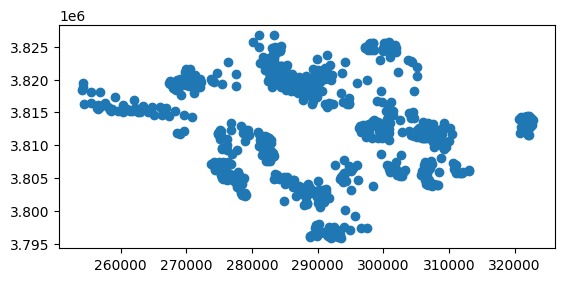

In [5]:
shp_c = shp.centroid
shp_c.plot()

<Axes: >

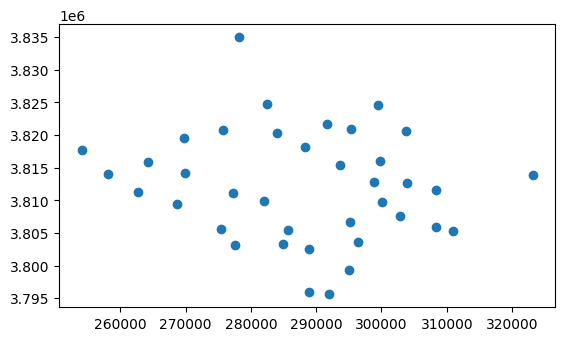

In [23]:
RI_path = r'/Volumes/PhD/imagery/masters/ROC/RI-stations.shp'
RI = gpd.read_file(RI_path)
RI.plot()

In [11]:
basin_coords = list(zip(shp_c.geometry.x, shp_c.geometry.y))
RI_coords = list(zip(RI.geometry.x, RI.geometry.y))

In [18]:
tree = cKDTree(RI_coords)

distances, indices = tree.query(basin_coords)


In [19]:
shp['nearest_station'] = indices
shp['distance_to_station'] = distances

In [21]:
shp['nearest_station']

0      23
1      29
2      29
3      21
4      37
       ..
732    10
733    25
734    25
735    25
736    25
Name: nearest_station, Length: 737, dtype: int64

In [29]:
RI['RI_index'] = RI.index

shp = shp.merge(RI[['RI_index', 'RI']],
                left_on = 'nearest_station', right_on = 'RI_index',
                how = 'left')

In [31]:
shp['RI']

0       5.08
1       7.11
2       7.11
3      12.95
4       6.10
       ...  
732     9.14
733     7.37
734     7.37
735     7.37
736     7.37
Name: RI, Length: 737, dtype: float64

In [32]:
out = r'/Volumes/PhD/imagery/masters/ROC/ROC_basins.shp'
shp.to_file(out)

/var/folders/mm/sjj0b1k91z39pkxfzn0rj_1h0000gn/T/ipykernel_14543/891525638.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  shp.to_file(out)
/Users/samueltaylor/Documents/GitHub/PHA_burn_severity/.venv/lib/python3.9/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'nearest_station' to 'nearest_st'
  ogr_write(
/Users/samueltaylor/Documents/GitHub/PHA_burn_severity/.venv/lib/python3.9/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'distance_to_station' to 'distance_t'
  ogr_write(
